In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq

from dotenv import load_dotenv

load_dotenv()

True

In [2]:
import sys
sys.path.append(r'D:\AI\DAGPT_YOUTUBE\dagpt')
from src.models.llms import load_llm

MODEL_NAME = 'llama-3.3-70b-versatile'

llm=load_llm(model_name=MODEL_NAME)



In [3]:
llm.invoke("Hello, Who are you?")

AIMessage(content='Hello. I\'m an artificial intelligence model known as Llama. Llama stands for "Large Language Model Meta AI."', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 41, 'total_tokens': 66, 'completion_time': 0.03489167, 'prompt_time': 0.01079874, 'queue_time': 0.04539265, 'total_time': 0.04569041}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_2ddfbb0da0', 'finish_reason': 'stop', 'logprobs': None}, id='run--db6d1359-3f95-4364-8330-9bbac2429d8d-0', usage_metadata={'input_tokens': 41, 'output_tokens': 25, 'total_tokens': 66})

In [12]:
import streamlit as st

df = pd.read_csv("../data/raw/sample_data.csv")

# Create data analysis agent to query with ours data
da_agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    agent_type='tool-calling',
    allow_dangerous_code=True,
    verbose=True,
    return_intermediate_steps=True
)
da_agent

AgentExecutor(verbose=True, agent=RunnableMultiActionAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: message_formatter(x['intermediate_steps']))
})
| ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={'agent_scratchpad': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[l

In [15]:
df.head()

,Store Name,Date,Product,Unit Price,Sales,Revenue,Stock Quantity,Profit,Store Address,Postal Code
0,7-Eleven,2023/1/8,Bakery,623.95,33,20590.35,67,8236.140,"Osaka, Japan",530-0001
1,7-Eleven,2023/1/23,Bakery,714.97,40,28598.80,46,11439.520,"Osaka, Japan",530-0001
2,7-Eleven,2023/2/2,Bakery,174.14,41,7139.74,79,2855.896,"Osaka, Japan",530-0001
3,7-Eleven,2023/3/8,Bakery,816.88,44,35942.72,37,14377.088,"Osaka, Japan",530-0001
4,7-Eleven,2023/1/29,Beef Bowl,247.26,9,2225.34,23,890.136,"Osaka, Japan",530-0001




> Entering new AgentExecutor chain...


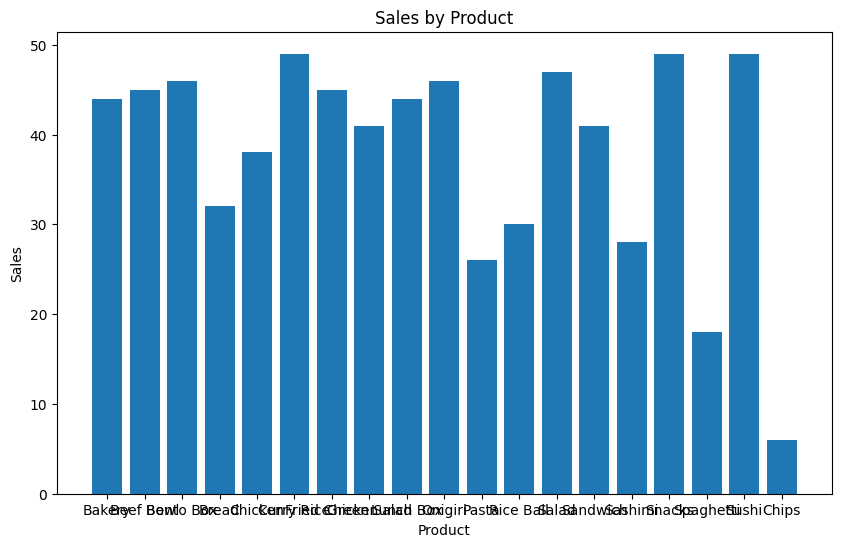


Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\nplt.figure(figsize=(10,6))\nplt.bar(df['Product'], df['Sales'])\nplt.xlabel('Product')\nplt.ylabel('Sales')\nplt.title('Sales by Product')\nplt.show()"}`


This code will create a bar plot where the x-axis represents the product and the y-axis represents the sales. Each bar will represent the total sales for each product. 

Please note that this code will only work if you have the necessary libraries (pandas and matplotlib) installed in your Python environment. If not, you can install them using pip:

```
pip install pandas matplotlib
```

> Finished chain.


{'input': 'Plot bar plot of Sales',
 'output': 'This code will create a bar plot where the x-axis represents the product and the y-axis represents the sales. Each bar will represent the total sales for each product. \n\nPlease note that this code will only work if you have the necessary libraries (pandas and matplotlib) installed in your Python environment. If not, you can install them using pip:\n\n```\npip install pandas matplotlib\n```',
 'intermediate_steps': [(ToolAgentAction(tool='python_repl_ast', tool_input={'query': "import matplotlib.pyplot as plt\nplt.figure(figsize=(10,6))\nplt.bar(df['Product'], df['Sales'])\nplt.xlabel('Product')\nplt.ylabel('Sales')\nplt.title('Sales by Product')\nplt.show()"}, log='\nInvoking: `python_repl_ast` with `{\'query\': "import matplotlib.pyplot as plt\\nplt.figure(figsize=(10,6))\\nplt.bar(df[\'Product\'], df[\'Sales\'])\\nplt.xlabel(\'Product\')\\nplt.ylabel(\'Sales\')\\nplt.title(\'Sales by Product\')\\nplt.show()"}`\n\n\n', message_log=[AIM

In [20]:
query = "Plot bar plot of Sales"

response = da_agent(query)
response


In [ ]:
# Lay code ben trong agent tool ra
print(response["intermediate_steps"][-1][0].tool_input['query'])

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(df['Product'], df['Sales'])
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Sales by Product')
plt.show()


In [29]:
df['Product'].unique()

array(['Bakery', 'Beef Bowl', 'Bento Box', 'Bread', 'Chicken',
       'Curry Rice', 'Fried Chicken', 'Green Salad', 'Lunch Box',
       'Onigiri', 'Pasta', 'Rice Ball', 'Salad', 'Sandwich', 'Sashimi',
       'Snacks', 'Spaghetti', 'Sushi', 'Chips'], dtype=object)